In [3]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.


In [4]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model = ResNet50(weights='imagenet')

In [1]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3f/Walking_tiger_female.jpg

--2024-01-21 12:41:01--  https://upload.wikimedia.org/wikipedia/commons/3/3f/Walking_tiger_female.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9753570 (9.3M) [image/jpeg]
Saving to: ‘Walking_tiger_female.jpg’

Walking_tiger_femal 100%[===================>]   9.30M  29.1MB/s    in 0.3s    

2024-01-21 12:41:01 (29.1 MB/s) - ‘Walking_tiger_female.jpg’ saved [9753570/9753570]



In [6]:
img_path = 'Walking_tiger_female.jpg'#'Walking_tiger_female.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [4]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n02129604', 'tiger', 0.90185344), ('n02123159', 'tiger_cat', 0.08526058), ('n02391049', 'zebra', 0.010305659)]


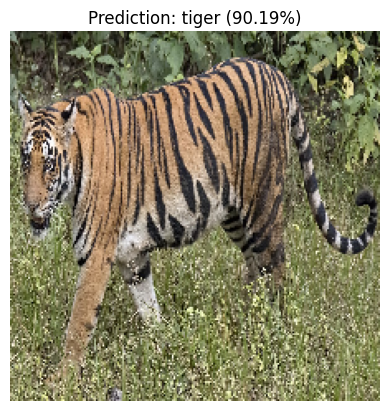

In [5]:
# Display the image
plt.imshow(img)
plt.axis('off')

# Get top prediction
top_pred = decode_predictions(preds, top=1)[0][0]
plt.title(f"Prediction: {top_pred[1]} ({top_pred[2]*100:.2f}%)")
plt.show()
